# Import Libraries And Dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [2]:

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


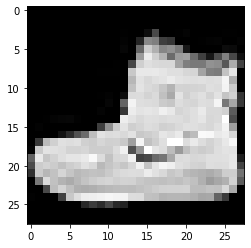

In [3]:
plt.imshow(X_train[0], cmap="gray")

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

# Perform data visualisation

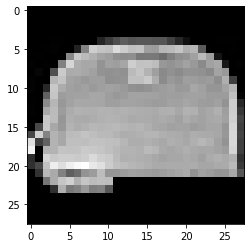

In [6]:

i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( X_train[i] , cmap = 'gray') # reshape and plot the image

In [7]:
label = y_train[i]
label


8

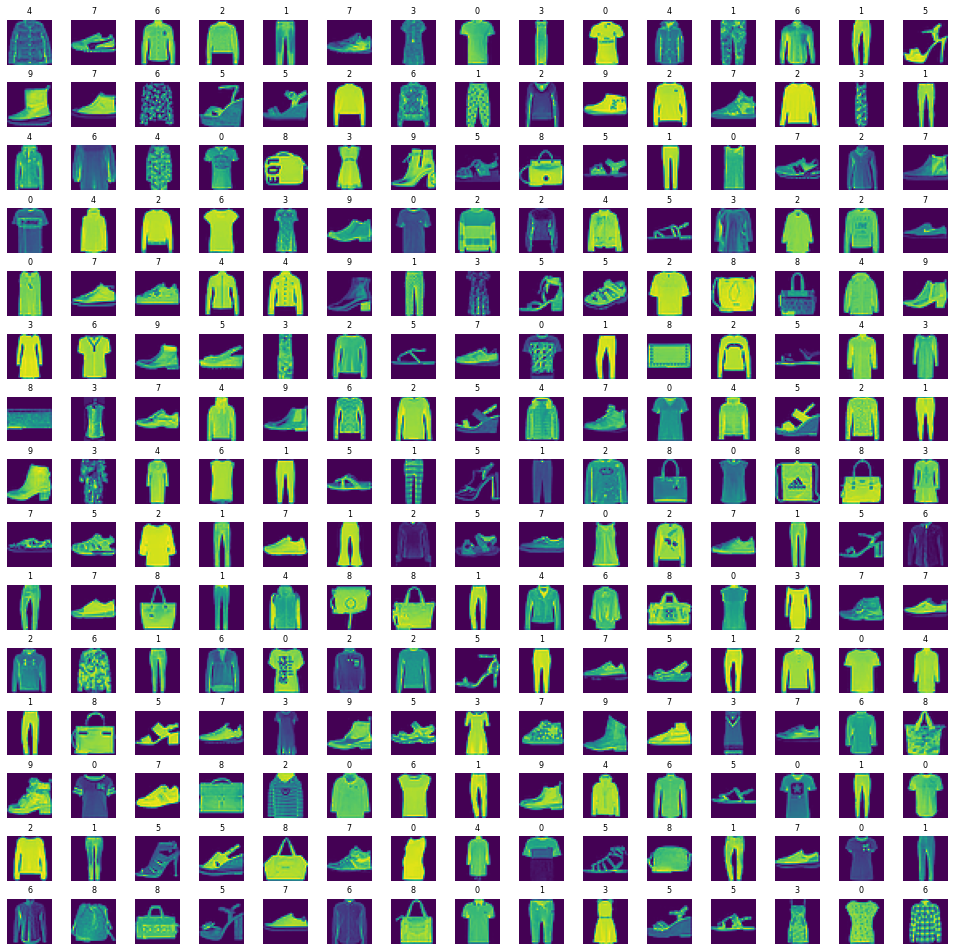

In [8]:
# view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Now we are selecting a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


# Performing Data Preprocessing

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
noise_factor = 0.3

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)

In [11]:
noise_dataset = np.array(noise_dataset)

In [12]:
noise_dataset.shape

(60000, 28, 28)

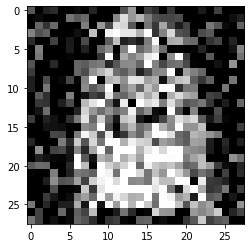

In [13]:
plt.imshow(noise_dataset[22], cmap="gray")

In [14]:
noise_test_set = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)
  
noise_test_set = np.array(noise_test_set)
noise_test_set.shape

(10000, 28, 28)

# Building and training Autoencoder Deep  Learning  Model

In [15]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))


In [16]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),          
                X_train.reshape(-1, 28, 28, 1), 
                epochs=10, 
                batch_size=200, 
                validation_data=(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 523us/sample - loss: 0.3984 - val_loss: 0.3244
Epoch 2/10
60000/60000 [==============================] - 30s 501us/sample - loss: 0.3154 - val_loss: 0.3132
Epoch 3/10
60000/60000 [==============================] - 30s 501us/sample - loss: 0.3088 - val_loss: 0.3092
Epoch 4/10
60000/60000 [==============================] - 30s 504us/sample - loss: 0.3057 - val_loss: 0.3067
Epoch 5/10
60000/60000 [==============================] - 31s 510us/sample - loss: 0.3037 - val_loss: 0.3051
Epoch 6/10
60000/60000 [==============================] - 30s 506us/sample - loss: 0.3024 - val_loss: 0.3042
Epoch 7/10
60000/60000 [==============================] - 31s 513us/sample - loss: 0.3016 - val_loss: 0.3035
Epoch 8/10
59800/60000 [============================>.] - ETA: 0s - loss: 0.3010

# Evaluating trained model performance

In [ ]:
evaluation = autoencoder.evaluate(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Accuracy : {:.3f}'.format(evaluation))

In [ ]:
predicted = autoencoder.predict(noise_test_set[:10].reshape(-1, 28, 28, 1))

In [ ]:
predicted.shape

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)